In [2]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=ee282be5b01dda7d8000f80a03b0174bf0621037b868a8e6cf0933a1c5ff6a5b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
#For this project we need to use GPU instead of CPU for deep learning libraries.
#We use colab GPU machine for it.
!nvidia-smi

Wed Jan  3 11:41:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Neccesarry libraries are dowloaded in this section.
import os
import numpy as np
import pickle
import requests
import matplotlib.pyplot as plt
import wget
import tensorflow as tf
from tensorflow import keras
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# In this part which is given by tutor we upload course work data from mydrive file.
def load_coursework_data():
    path_to_check = os.path.join('/content/drive/MyDrive/MachineLearningCourseWork/image_recognition_dataset.pth')
    if not os.path.exists(path_to_check):
        print("Cannot find the dataset on local !")
        print("Downloading the dataset from cloud, it may take several mintues.")
        url = 'https://www.dropbox.com/s/j05hyf667ikzu4s/image_recognition_dataset.pth?dl=1'
        filename = wget.download(url)
        data_path = os.path.join('', filename)
    else:
        print("Data founded on local {:s}".format(path_to_check))
        data_path = '/content/drive/MyDrive/MachineLearningCourseWork/image_recognition_dataset.pth'

    data = pickle.load(open(data_path, 'rb'))
    train_imgs,train_labels,test_imgs,test_labels = data.values()
    return train_imgs,train_labels,test_imgs,test_labels

In [6]:
#In this part we take datas into related lists.
train_imgs,train_labels,test_imgs,test_labels = load_coursework_data()

Data founded on local /content/drive/MyDrive/MachineLearningCourseWork/image_recognition_dataset.pth


In [7]:
#In next line we separeted the training data into training and validation data and also change the values between 0 and 1 scala.
train_images, valid_images = train_imgs[:35000] / 255. , train_imgs[35000:] / 255
#In next line we separeted the traing labels into training and validation labels
train_lab, valid_lab =train_labels[:35000],train_labels[35000:]
#In next line we take test images and convert them into 0 and 1 scala.
test_imgs = test_imgs / 255.
#In the next line we define class names as it is given in dataset word document which is given by tutor.
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse"]

In [9]:
#In this part we are be able to see al of our datas shape. We basicly have 35000 training, 5000 validation and 8000 test data.
cls_train = len(np.unique(train_labels))
print("Total number of image classes : {:d}".format(cls_train))
print("Shape of total training set", train_imgs.shape)
print("Shape of training set", train_images.shape)
print("Shape of validation set", valid_images.shape)
print("Test image count: ", test_imgs.shape)

Total number of image classes : 8
Shape of total training set (40000, 32, 32, 3)
Shape of training set (35000, 32, 32, 3)
Shape of validation set (5000, 32, 32, 3)
Test image count:  (8000, 32, 32, 3)


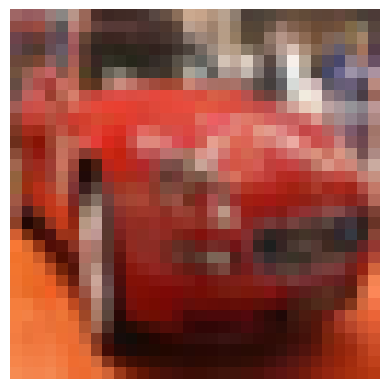

In [10]:
#In this part we can see one of the training data as picture.
plt.imshow(train_imgs[3], cmap="binary")
plt.axis('off')
plt.show()

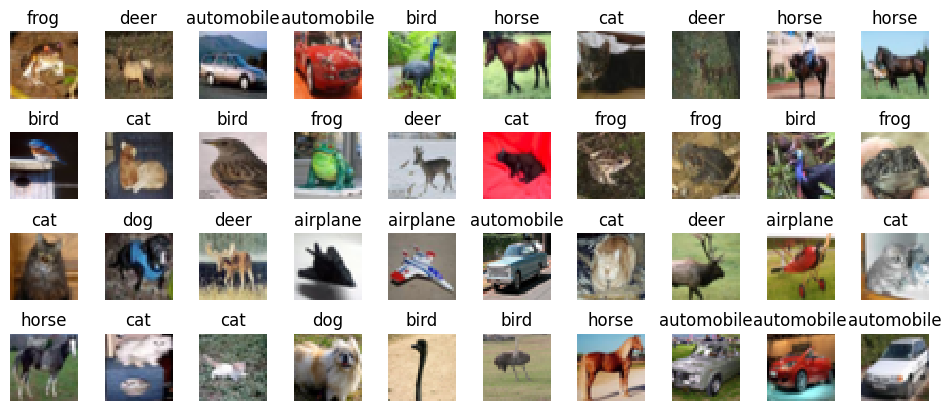

In [11]:
#We can also display first 40 images in training set to observe.
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_imgs[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(train_labels[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

START BUILDING MODELS AFTER THIS STATEMENT

IN THE NEXT STATEMENT WE WILL DESIGN A MODEL WITH ONLY USING MULTI LAYER PERCEPTRONS

**Model 1**  Design Only Using Multi Layer Perceptron Layers to Build a Model

In this part a model will be created only using dense layers and some of the regulations methods. But none of the convolutional or pooling layers will be used. And we will see the result.

In [12]:
#In next line regulation libraries is downloaded.
from keras.regularizers import l1,l2

# The model is created with using input, output and the mlp layers.
# And the weight regulations method is applied to avoid overfitting.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32,3]),
    keras.layers.Dense(units=1024, activation='relu'),
    keras.layers.Dense(units=256, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(units=32, activation='relu', kernel_regularizer=l1(0.001)),
    keras.layers.Dense(units=8, activation='softmax'),
])

# For compile method we use metrics as accuracy and loss as sparse_categorical_crossentropy as regular.
# As optimizer we used Stochastic gradient descent since it gives better result than adam and nadam.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# With writing summart we can see the summary of our model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
Total params: 3417640 (13.04 MB)
Trainable params: 3417640 (13.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# setup a timer to know training time spent
import time
start_time = time.process_time()

# We train our model for 30 epochs
history = model.fit(train_images, train_lab, epochs=30,
                    validation_data=(valid_images, valid_lab))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes")

Epoch 1/30
1094/1094 [==============================] - 8s 5ms/step - loss: 2.7328 - accuracy: 0.3385 - val_loss: 2.5788 - val_accuracy: 0.3734
Epoch 2/30
1094/1094 [==============================] - 4s 4ms/step - loss: 2.4514 - accuracy: 0.4162 - val_loss: 2.3969 - val_accuracy: 0.4164
Epoch 3/30
1094/1094 [==============================] - 5s 5ms/step - loss: 2.2884 - accuracy: 0.4452 - val_loss: 2.2765 - val_accuracy: 0.4304
Epoch 4/30
1094/1094 [==============================] - 5s 4ms/step - loss: 2.1657 - accuracy: 0.4637 - val_loss: 2.1393 - val_accuracy: 0.4522
Epoch 5/30
1094/1094 [==============================] - 4s 4ms/step - loss: 2.0559 - accuracy: 0.4791 - val_loss: 2.0578 - val_accuracy: 0.4736
Epoch 6/30
1094/1094 [==============================] - 4s 4ms/step - loss: 1.9621 - accuracy: 0.4924 - val_loss: 1.9968 - val_accuracy: 0.4644
Epoch 7/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.8834 - accuracy: 0.5020 - val_loss: 1.8736 - val_accuracy:

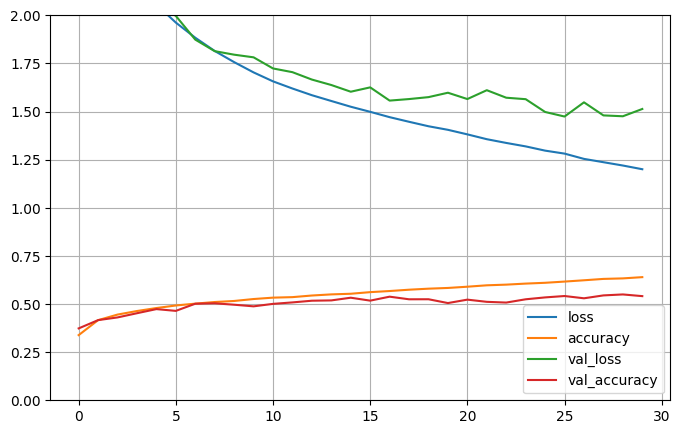

In [14]:
# To draw history graph we import pandas
import pandas as pd

# Plot the history graph to observe training process
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [15]:
# In this section we test our test data set and see the result.
model.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.4758 - accuracy: 0.5446


[1.4758001565933228, 0.5446249842643738]

**Model 2**  Using CNN Layers to Build a Model

In this part a model will be created model with using CNN layers like conv, pooling and dense to improve our result. And we will see the result.

In [16]:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="same")

# In this model there are also pooling and the convolutional layers are used to improve result.
# There is also dropout normalization method used to avoid overfitting.

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3], padding="same"),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),# Used to make multi dim. array to the one dim array.
    keras.layers.Dense(units=1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=8, activation='softmax'),
])

# Model compile just as like model 1.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 256)        

In [17]:
# setup a timer to know training time spent
import time
start_time = time.process_time()

# We train our model for 30 epochs
history = model.fit(train_images, train_lab, epochs=30,
                    validation_data=(valid_images, valid_lab))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes")

Epoch 1/30
1094/1094 [==============================] - 13s 7ms/step - loss: 2.0017 - accuracy: 0.2025 - val_loss: 1.8593 - val_accuracy: 0.2996
Epoch 2/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.8104 - accuracy: 0.3089 - val_loss: 1.6344 - val_accuracy: 0.3942
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.6200 - accuracy: 0.3951 - val_loss: 1.4747 - val_accuracy: 0.4576
Epoch 4/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.4888 - accuracy: 0.4454 - val_loss: 1.3611 - val_accuracy: 0.5054
Epoch 5/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.3984 - accuracy: 0.4857 - val_loss: 1.3446 - val_accuracy: 0.5044
Epoch 6/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.3244 - accuracy: 0.5128 - val_loss: 1.2419 - val_accuracy: 0.5552
Epoch 7/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.2602 - accuracy: 0.5366 - val_loss: 1.1827 - val_accuracy

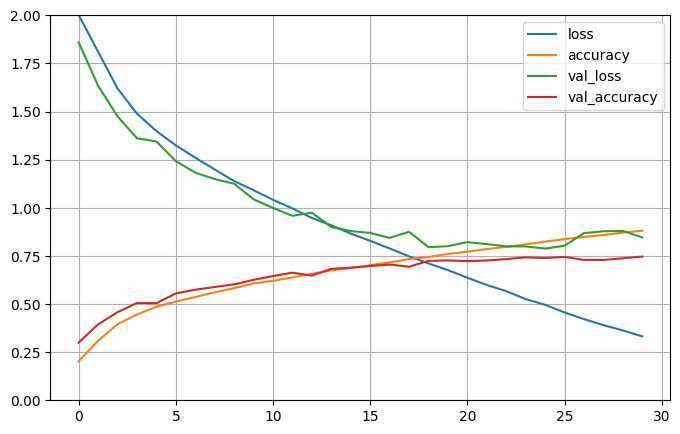

In [18]:
# To draw history graph we import pandas
import pandas as pd

# Plot the history graph to observe training process
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [19]:
# In this section we test our test data set and see the result.
model.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 4ms/step - loss: 0.8857 - accuracy: 0.7356


[0.8857299089431763, 0.7356250286102295]

**Model 3** Using CNN Layers and batch normalization to Build a Model

In this part a model will be created model with using CNN layers like conv, pooling, dense and also batch normalization to improve our result. And we will see the result.

In [20]:
from functools import partial
from tensorflow.keras.layers import BatchNormalization, Input
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="same")

# In model 3 batch normalization method is additionaly used with convolutional and pooling layers.
# And also some of the parameters are change to get better result.

model = keras.models.Sequential([
    Input(shape=[32, 32,3]),
    DefaultConv2D(filters=32),
    BatchNormalization(),
    DefaultConv2D(filters=32),
    BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    BatchNormalization(),
    DefaultConv2D(filters=64),
    BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    BatchNormalization(),
    DefaultConv2D(filters=128),
    BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

# In compiling section adam is used as optimizer since it gives better result when it compared to others
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [21]:
# setup a timer to know training time spent
import time
start_time = time.process_time()

# We train our model for 30 epochs
history = model.fit(train_images, train_lab, epochs=30,
                    validation_data=(valid_images, valid_lab))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes")

Epoch 1/30
1094/1094 [==============================] - 15s 8ms/step - loss: 1.4077 - accuracy: 0.5137 - val_loss: 1.0273 - val_accuracy: 0.6290
Epoch 2/30
1094/1094 [==============================] - 9s 9ms/step - loss: 0.9843 - accuracy: 0.6485 - val_loss: 1.3774 - val_accuracy: 0.5872
Epoch 3/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.8299 - accuracy: 0.7073 - val_loss: 0.8282 - val_accuracy: 0.7046
Epoch 4/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.7154 - accuracy: 0.7533 - val_loss: 0.7041 - val_accuracy: 0.7574
Epoch 5/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.6204 - accuracy: 0.7855 - val_loss: 0.6593 - val_accuracy: 0.7798
Epoch 6/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.5274 - accuracy: 0.8201 - val_loss: 0.6541 - val_accuracy: 0.7812
Epoch 7/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.4523 - accuracy: 0.8443 - val_loss: 0.6515 - val_accuracy

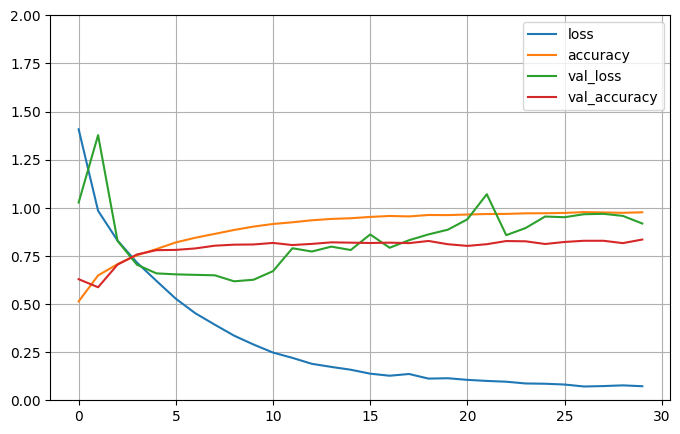

In [22]:
# To draw history graph we import pandas
import pandas as pd

# Plot the history graph to observe training process
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [23]:
# In this section we test our test data set and see the result.
model.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 5ms/step - loss: 0.9321 - accuracy: 0.8275


[0.9321115016937256, 0.8274999856948853]

1/1 [==============================] - 1s 529ms/step
automobile


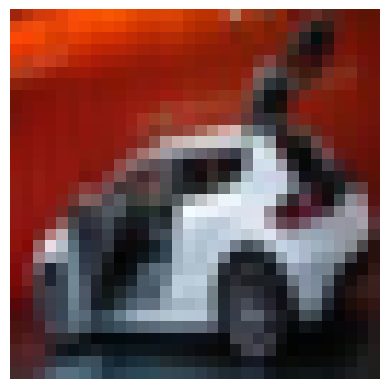

In [24]:
# In this part we make individual prediction for one of the test set and compare with the image.
predicted_value = model.predict(test_imgs[4:5])
print(class_names[np.argmax(predicted_value,axis=1)[0]])
#In this part we can see the predicted picture.
plt.imshow(test_imgs[4], cmap="binary")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 18ms/step
frog


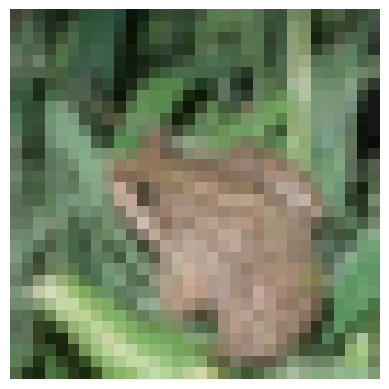

In [25]:
# In this part we make individual prediction for one of the test set and compare with the image.
predicted_value = model.predict(test_imgs[2:3])
print(class_names[np.argmax(predicted_value,axis=1)[0]])
#In this part we can see the predicted picture.
plt.imshow(test_imgs[2], cmap="binary")
plt.axis('off')
plt.show()